#**Part 1**

###**VGG16 Architecture**

**What is VGG16?**

VGG16 is a type of CNN (Convolutional Neural Network) that is considered to be one of the best computer vision models to date. The creators of this model evaluated the networks and increased the depth using an architecture with very small (3 × 3) convolution filters, which showed a significant improvement on the prior-art configurations. They pushed the depth to 16–19 weight layers making it approx — 138 trainable parameters.

**What is VGG16 used for?**

VGG16 is object detection and classification algorithm which is able to classify 1000 images of 1000 different categories with 92.7% accuracy. It is one of the popular algorithms for image classification and is easy to use with transfer learning.

**VGG16 Architecture**

In [ ]:
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


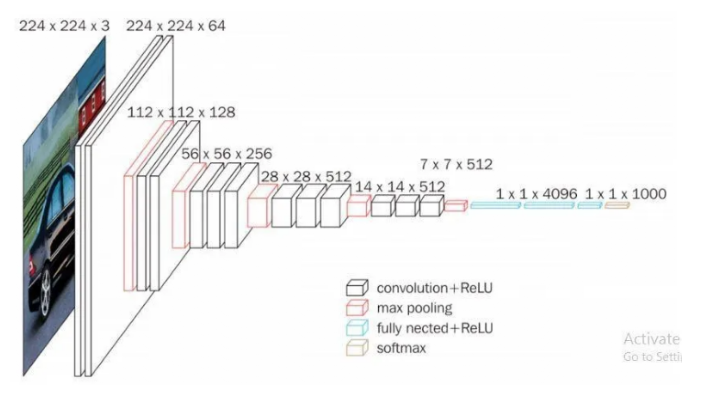

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project_1/images/1.png')
plt.figure(figsize = (100,5))
plt.axis('off')
plt.imshow(image1);

* The 16 in VGG16 refers to 16 layers that have weights. In VGG16 there are
thirteen convolutional layers, five Max Pooling layers, and three Dense layers which sum up to 21 layers but it has only sixteen weight layers i.e., learnable parameters layer.

* VGG16 takes input tensor size as 224, 244 with 3 RGB channel.

* Most unique thing about VGG16 is that instead of having a large number of hyper-parameters they focused on having convolution layers of 3x3 filter with stride 1 and always used the same padding and maxpool layer of 2x2 filter of stride 2.

* The convolution and max pool layers are consistently arranged throughout the whole architecture.

* Conv-1 Layer has 64 number of filters, Conv-2 has 128 filters, Conv-3 has 256 filters, Conv 4 and Conv 5 has 512 filters.[1]

Source:

[1]: https://arxiv.org/pdf/1409.1556

(1): https://arxiv.org/pdf/1409.1556

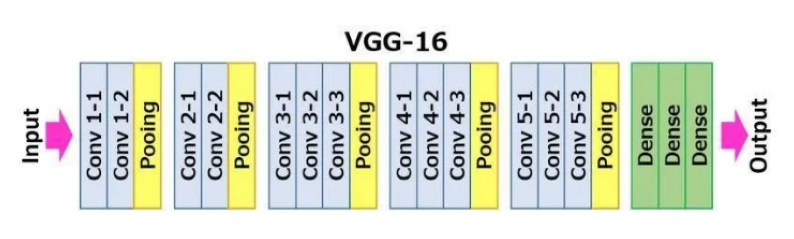

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project_1/images/2.png')
plt.figure(figsize = (10,5))
plt.axis('off')
plt.imshow(image1);

###**ResNet50 Architecture**

**Why do we need ResNet architecture?**

Using more layers in a deep neural network often lower the error rate of our model. This is effective for smaller numbers of layers, but when we add more layers, a typical deep learning issue known as the Vanishing/Exploding gradient arises. This results in the gradient becoming zero or being overly large. Therefore, the training and test error rate similarly increases as the number of layers is increased.

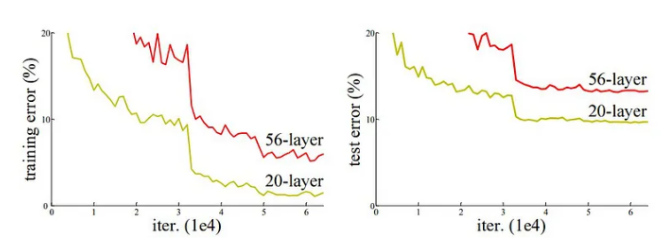

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project_1/images/3.png')
plt.figure(figsize = (50,3))
plt.axis('off')
plt.imshow(image1);

We can see from the following figure that a 20-layer CNN architecture performs better on training and testing datasets than a 56-layer CNN architecture.[1]

[1]: https://arxiv.org/pdf/1512.03385v1

**How does ResNet solves vanishing gradient problem?**

ResNet provides an innovative solution to the vanishing gradient problem, known as “skip connections”. ResNet stacks multiple identity mappings (convolutional layers that do nothing at first), skips those layers, and reuses the activations of the previous layer. Skipping speeds up initial training by compressing the network into fewer layers.

Then, when the network is retrained, all layers are expanded and the remaining parts of the network—known as the residual parts—are allowed to explore more of the feature space of the input image.

Most ResNet models skip two or three layers at a time with nonlinearity and batch normalization in between. More advanced ResNet architectures, known as HighwayNets, can learn “skip weights”, which dynamically determine the number of layers to skip.[2]

[2]: https://datagen.tech/guides/computer-vision/resnet/#

**ResNet50 architecture**

ResNet-50 is a 50-layer convolutional neural network (48 convolutional layers, one MaxPool layer, and one average pool layer).[3]

[3]: https://datagen.tech/guides/computer-vision/resnet-50/#:~:text=ResNet%2D50%20is%20a%2050,networks%20by%20stacking%20residual%20blocks.

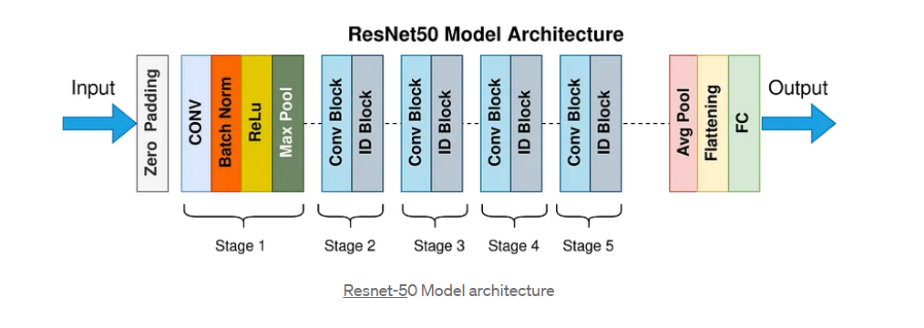

In [ ]:
image1 = plt.imread('/content/drive/MyDrive/AI/Project_1/images/4.png')
plt.figure(figsize = (50,4))
plt.axis('off')
plt.imshow(image1);

Sources:

(1): https://arxiv.org/pdf/1512.03385v1

(2): https://datagen.tech/guides/computer-vision/resnet/#

(3): https://datagen.tech/guides/computer-vision/resnet-50/#:~:text=ResNet%2D50%20is%20a%2050,networks%20by%20stacking%20residual%20blocks.

###**Use Data-Dermoscopic_Images with VGG16 model**

###**Design model without Data Augmentation**

###**VGG16**

####1. Import necessary libraries

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from keras.utils import image_dataset_from_directory
from keras.models import Model
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.layers import Dropout

####2. We import all vgg16 packages.

In [ ]:
from keras.applications.vgg16 import VGG16

####3. We instantiate the VGG16 model.

In [ ]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


####4. We specify that the layers are not trainable.

In [ ]:
for layer in model.layers:
    layer.trainable = False

####5. We do all the following steps:
Flatten the output from the second last fully connected layer in VGG.
Fully connected layer with 512 hidden units and ReLU activation.
The last fully connected sigmoid layer with five neurons.

In [ ]:
flatten_layer = layers.Flatten()(model.output)
flatten_layer = layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001))(flatten_layer)
flatten_layer = Dropout(0.5)(flatten_layer)
flatten_layer = layers.Dense(3, activation='softmax')(flatten_layer)

####6. We define a new model with a base VGG model combined with the new layers that we have created.

In [ ]:
model = Model(inputs=model.inputs, outputs=flatten_layer)

####7. Load data

In [ ]:
directory = '/content/drive/MyDrive/AI/Project_1/datasets/Data_Dermoscopic_Images'
dataset = image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='both',
)

Found 173 files belonging to 3 classes.
Using 139 files for training.
Using 34 files for validation.


####8. Compile model and fit it.

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(dataset[0], validation_data = dataset[1], epochs=100, batch_size = 64)

Epoch 1/100
3/3 [==============================] - 5s 679ms/step - loss: 29.1998 - accuracy: 0.3381 - val_loss: 23.0091 - val_accuracy: 0.6176
Epoch 2/100
3/3 [==============================] - 3s 569ms/step - loss: 7.5239 - accuracy: 0.7986 - val_loss: 27.8838 - val_accuracy: 0.5588
Epoch 3/100
3/3 [==============================] - 4s 765ms/step - loss: 2.5158 - accuracy: 0.8849 - val_loss: 17.5099 - val_accuracy: 0.6471
Epoch 4/100
3/3 [==============================] - 4s 576ms/step - loss: 1.8252 - accuracy: 0.8993 - val_loss: 15.3790 - val_accuracy: 0.6471
Epoch 5/100
3/3 [==============================] - 3s 575ms/step - loss: 1.5893 - accuracy: 0.9281 - val_loss: 17.9189 - val_accuracy: 0.7059
Epoch 6/100
3/3 [==============================] - 3s 694ms/step - loss: 0.9212 - accuracy: 0.9640 - val_loss: 20.6105 - val_accuracy: 0.7353
Epoch 7/100
3/3 [==============================] - 3s 569ms/step - loss: 0.8912 - accuracy: 0.9640 - val_loss: 22.8391 - val_accuracy: 0.6471
Epoch

####9. Plot Accuracy.

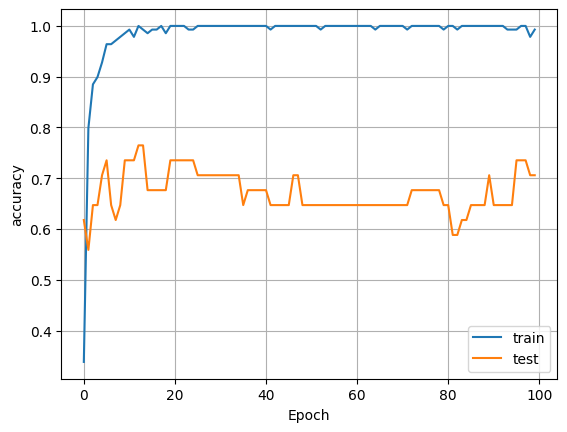

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

####9. Plot Loss.

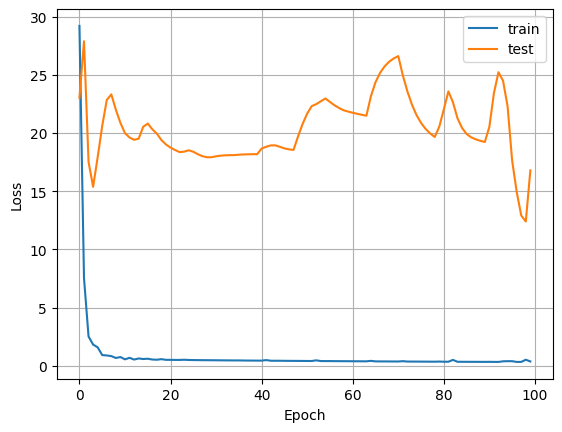

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

###**ResNet50**

####1. Import necessary libraries

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from keras.utils import image_dataset_from_directory
from keras.models import Model
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.layers import Dropout

####2. We import all ResNet50 packages.

In [ ]:
from keras.applications.resnet50 import ResNet50

####3. We instantiate the ResNeet50 model.

In [ ]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

####4. We specify that the layers are not trainable.

In [ ]:
for layer in model.layers:
    layer.trainable = False

####5. We do all the following steps:
Flatten the output from the second last fully connected layer in VGG.
Fully connected layer with 512 hidden units and ReLU activation.
The last fully connected sigmoid layer with five neurons.

In [ ]:
flatten_layer = layers.Flatten()(model.output)
flatten_layer = layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001))(flatten_layer)
flatten_layer = Dropout(0.5)(flatten_layer)
flatten_layer = layers.Dense(3, activation='softmax')(flatten_layer)

####6. We define a new model with a base VGG model combined with the new layers that we have created.

In [ ]:
model = Model(inputs=model.inputs, outputs=flatten_layer)

####7. Load data

In [ ]:
directory = '/content/drive/MyDrive/AI/Project_1/datasets/Data_Dermoscopic_Images'
dataset = image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    batch_size=128,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='both',
)

Found 173 files belonging to 3 classes.
Using 139 files for training.
Using 34 files for validation.


####8. Compile model and fit it.

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(dataset[0], validation_data = dataset[1], epochs=100, batch_size = 128)

Epoch 1/100
2/2 [==============================] - 9s 2s/step - loss: 4.6456 - accuracy: 0.2590 - val_loss: 35.5513 - val_accuracy: 0.6176
Epoch 2/100
2/2 [==============================] - 3s 770ms/step - loss: 5.5335 - accuracy: 0.8345 - val_loss: 25.1135 - val_accuracy: 0.6176
Epoch 3/100
2/2 [==============================] - 3s 751ms/step - loss: 6.2036 - accuracy: 0.8417 - val_loss: 54.7219 - val_accuracy: 0.5588
Epoch 4/100
2/2 [==============================] - 4s 1s/step - loss: 5.0721 - accuracy: 0.8921 - val_loss: 58.6857 - val_accuracy: 0.6471
Epoch 5/100
2/2 [==============================] - 3s 735ms/step - loss: 2.1316 - accuracy: 0.9640 - val_loss: 44.9313 - val_accuracy: 0.6765
Epoch 6/100
2/2 [==============================] - 3s 731ms/step - loss: 2.9746 - accuracy: 0.9712 - val_loss: 42.3846 - val_accuracy: 0.7059
Epoch 7/100
2/2 [==============================] - 5s 2s/step - loss: 2.5454 - accuracy: 0.9784 - val_loss: 43.2190 - val_accuracy: 0.7059
Epoch 8/100
2/2

####9. Plot Accuracy.

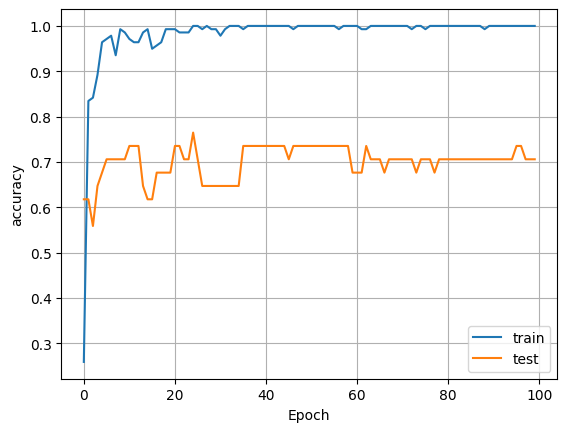

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

####10. Plot Loss.

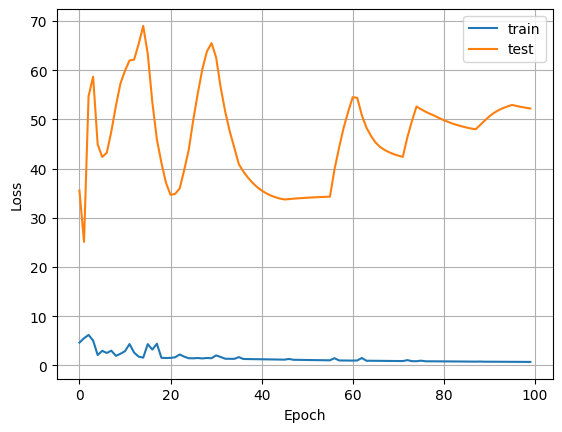

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

The performance of ResNet50 and VGG16 can vary depending on the specific task you're working on and the dataset you're using. However, generally speaking, ResNet50 tends to outperform VGG16 in terms of both accuracy and training efficiency.

###**Design model with Data Augmentation**

**Use VGG16**

Found 173 files belonging to 3 classes.
Using 139 files for training.
Using 34 files for validation.
Epoch 1/100
5/5 [==============================] - 3s 357ms/step - loss: 6.9516 - accuracy: 0.3597 - val_loss: 5.4185 - val_accuracy: 0.1765
Epoch 2/100
5/5 [==============================] - 2s 342ms/step - loss: 3.3977 - accuracy: 0.3813 - val_loss: 3.0647 - val_accuracy: 0.3529
Epoch 3/100
5/5 [==============================] - 2s 362ms/step - loss: 2.3286 - accuracy: 0.4748 - val_loss: 1.6815 - val_accuracy: 0.5000
Epoch 4/100
5/5 [==============================] - 2s 436ms/step - loss: 1.9875 - accuracy: 0.5468 - val_loss: 2.6913 - val_accuracy: 0.3529
Epoch 5/100
5/5 [==============================] - 3s 680ms/step - loss: 1.7199 - accuracy: 0.5036 - val_loss: 1.7447 - val_accuracy: 0.5588
Epoch 6/100
5/5 [==============================] - 2s 359ms/step - loss: 1.4963 - accuracy: 0.5971 - val_loss: 1.5457 - val_accuracy: 0.5588
Epoch 7/100
5/5 [==============================] - 2s

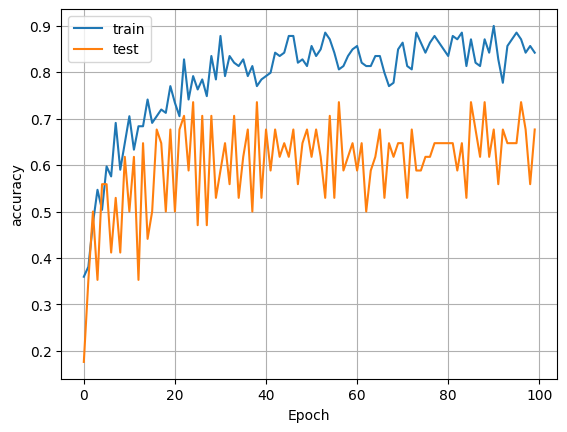

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from keras.utils import image_dataset_from_directory
from keras.models import Model
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import numpy as np

model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

for layer in model.layers:
    layer.trainable = False

flatten_layer = layers.Flatten()(model.output)
flatten_layer = layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001))(flatten_layer)
flatten_layer = Dropout(0.5)(flatten_layer)
flatten_layer = layers.Dense(3, activation='softmax')(flatten_layer)

model = Model(inputs=model.inputs, outputs=flatten_layer)

directory = '/content/drive/MyDrive/AI/Project_1/datasets/Data_Dermoscopic_Images'
dataset = image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='both',
)

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)
test_datagen = ImageDataGenerator(
    rescale = 1/255
)

images = []
labels = []
for image_batch, label_batch in dataset[0]:
    images.extend(image_batch.numpy())
    labels.extend(label_batch.numpy())

images = np.array(images)
labels = np.array(labels)

train_generator = train_datagen.flow(images, labels, batch_size=32)

images = []
labels = []
for image_batch, label_batch in dataset[1]:
    images.extend(image_batch.numpy())
    labels.extend(label_batch.numpy())

images = np.array(images)
labels = np.array(labels)

test_generator = test_datagen.flow(images, labels, batch_size=32)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(train_generator, validation_data = test_generator, epochs=100, batch_size = 5000)

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)


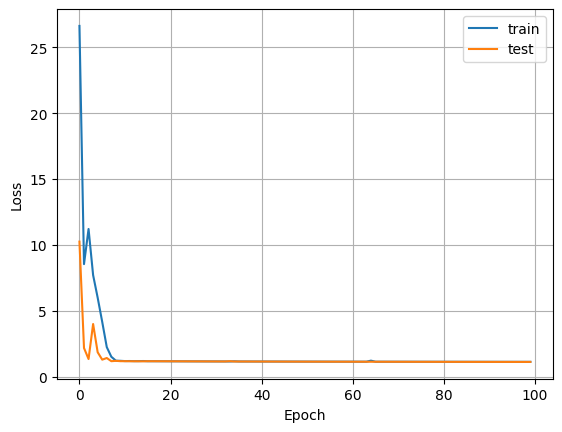

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

**Use ResNet50**

Found 173 files belonging to 3 classes.
Using 139 files for training.
Using 34 files for validation.
Epoch 1/100
5/5 [==============================] - 6s 550ms/step - loss: 26.6293 - accuracy: 0.2806 - val_loss: 10.2553 - val_accuracy: 0.4706
Epoch 2/100
5/5 [==============================] - 2s 418ms/step - loss: 8.5479 - accuracy: 0.3165 - val_loss: 2.1810 - val_accuracy: 0.3235
Epoch 3/100
5/5 [==============================] - 2s 507ms/step - loss: 11.2156 - accuracy: 0.3309 - val_loss: 1.3424 - val_accuracy: 0.4706
Epoch 4/100
5/5 [==============================] - 3s 534ms/step - loss: 7.7137 - accuracy: 0.2734 - val_loss: 4.0003 - val_accuracy: 0.1765
Epoch 5/100
5/5 [==============================] - 2s 359ms/step - loss: 6.0010 - accuracy: 0.2806 - val_loss: 1.8570 - val_accuracy: 0.4706
Epoch 6/100
5/5 [==============================] - 2s 374ms/step - loss: 4.1626 - accuracy: 0.3597 - val_loss: 1.2955 - val_accuracy: 0.2647
Epoch 7/100
5/5 [==============================] -

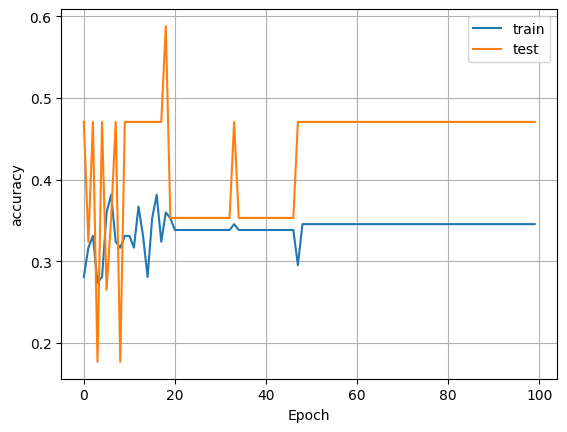

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from keras.utils import image_dataset_from_directory
from keras.models import Model
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
import numpy as np

model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

for layer in model.layers:
    layer.trainable = False

flatten_layer = layers.Flatten()(model.output)
flatten_layer = layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001))(flatten_layer)
flatten_layer = Dropout(0.5)(flatten_layer)
flatten_layer = layers.Dense(3, activation='softmax')(flatten_layer)

model = Model(inputs=model.inputs, outputs=flatten_layer)

directory = '/content/drive/MyDrive/AI/Project_1/datasets/Data_Dermoscopic_Images'
dataset = image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='both',
)

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)
test_datagen = ImageDataGenerator(
    rescale = 1/255
)

images = []
labels = []
for image_batch, label_batch in dataset[0]:
    images.extend(image_batch.numpy())
    labels.extend(label_batch.numpy())

images = np.array(images)
labels = np.array(labels)

train_generator = train_datagen.flow(images, labels, batch_size=32)

images = []
labels = []
for image_batch, label_batch in dataset[1]:
    images.extend(image_batch.numpy())
    labels.extend(label_batch.numpy())

images = np.array(images)
labels = np.array(labels)

test_generator = test_datagen.flow(images, labels, batch_size=32)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(train_generator, validation_data = test_generator, epochs=100, batch_size = 5000)

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

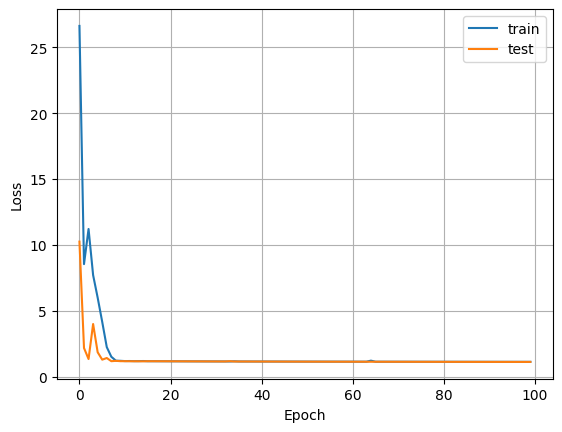

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

###**Advantages and Disadvantages of VGG16**

#####**Advantages of VGG16:**

1. Simplicity and Uniformity: VGG16 has a straightforward architecture consisting of repeated convolutional layers with small 3x3 filters, followed by max-pooling layers. This uniform structure makes it easy to understand and implement.

2. Transfer Learning: Pre-trained VGG16 models trained on large-scale image datasets like ImageNet are readily available. You can leverage these pre-trained models and fine-tune them for specific tasks with relatively small datasets, saving time and computational resources.

3. Good Performance: VGG16 performs well on a wide range of image recognition tasks, achieving competitive accuracy rates on benchmarks like ImageNet. Its simple architecture and large number of parameters allow it to learn complex features from data.

4. Effective Feature Extraction: The hierarchical architecture of VGG16 enables it to learn hierarchical features of increasing abstraction. This makes it effective for feature extraction in tasks like object detection and image classification.

5. Generalization: VGG16 has been shown to generalize well to diverse datasets and tasks, making it suitable for a variety of computer vision applications beyond the tasks it was originally trained on.

#####**Disadvantages of VGG16:**

1. Large Memory Footprint: VGG16 has a relatively large number of parameters compared to newer architectures like ResNet or EfficientNet. This can lead to higher memory requirements during training and inference, limiting its applicability in resource-constrained environments.

2. Computational Cost: Training VGG16 from scratch can be computationally expensive, especially when dealing with large datasets. Fine-tuning pre-trained models is a common strategy to mitigate this issue, but it still requires substantial computational resources.

3. Overfitting: VGG16 may be prone to overfitting, especially when applied to small datasets or tasks with limited diversity. Regularization techniques such as dropout or data augmentation are often necessary to mitigate this issue.

4. Limited Contextual Information: Due to its deep but relatively simple architecture, VGG16 may struggle to capture long-range dependencies and contextual information in images. This can limit its performance on tasks that require understanding of global image context.

5. Feature Redundancy: The stacking of multiple convolutional layers with small filters in VGG16 can result in redundant feature representations, increasing the risk of overfitting and computational inefficiency. More modern architectures have addressed this issue by using skip connections and bottleneck layers.

###**Advantages and Disadvantages of ResNet50**

#####**Advantages of ResNet50:**

1. Deeper Architecture: ResNet50 is deeper than earlier versions of ResNet, allowing it to capture more complex patterns and features from the input data. Deeper networks have been shown to perform better on a wide range of computer vision tasks.

2. Skip Connections: ResNet50 introduces skip connections or shortcuts that bypass one or more layers. These connections facilitate the flow of gradients during training, addressing the problem of vanishing gradients and enabling easier optimization of very deep networks.

3. Improved Gradient Flow: The skip connections in ResNet50 help alleviate the vanishing gradient problem by providing shortcut paths for gradient flow during backpropagation. This enables more efficient training of very deep networks and allows for faster convergence.

4. State-of-the-Art Performance: ResNet50, along with other variants of the ResNet architecture, has demonstrated state-of-the-art performance on various image classification benchmarks, including the ImageNet dataset. It achieves high accuracy rates while maintaining relatively simple architectural principles.

5. Transfer Learning: Pre-trained ResNet50 models are readily available, trained on large-scale datasets like ImageNet. These pre-trained models can be used as feature extractors or fine-tuned for specific tasks, providing a significant boost in performance and requiring less labeled data for training.

#####**Disadvantages of ResNet50:**

1. High Computational Cost: Like other deep neural network architectures, ResNet50 has a large number of parameters, resulting in high computational requirements for both training and inference. Training ResNet50 from scratch can be computationally expensive and time-consuming, especially without access to powerful hardware resources.

2. Memory Consumption: The deep architecture and large number of parameters in ResNet50 lead to high memory consumption during training, particularly when storing activations and gradients for backpropagation. This can limit the batch size that can fit into memory and slow down training.

3. Complexity and Overfitting: While skip connections help mitigate the vanishing gradient problem, they also introduce additional complexity to the model. This complexity can potentially increase the risk of overfitting, especially when training on small datasets. Regularization techniques like dropout or batch normalization may be necessary to address this issue.

4. Fixed Input Size: Like many deep neural networks, ResNet50 typically requires fixed-size input images, often 224x224 pixels. This limits its flexibility when working with images of different sizes or aspect ratios, requiring preprocessing steps such as resizing or cropping.

5. Interpretability: The deep and complex nature of ResNet50 makes it less interpretable compared to simpler architectures like VGG. Understanding the learned features and decision-making process of ResNet50 may be more challenging, especially in complex real-world scenarios.

#**Part 2**

 ## **Create a Deep Convolutional Generative Adversarial Network for the CIFAR-10 dataset**

###**1. Load Data**

####Load libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

####Getting the data

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


####Explore visual data

The CIFAR-10 images are RGB with 10 classes

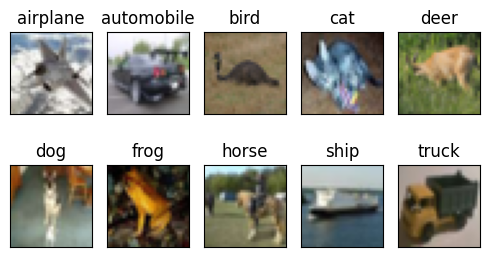

In [ ]:
WIDTH_SIZE = 5
HEIGHT_SIZE = 3

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(WIDTH_SIZE, HEIGHT_SIZE))
for i in range(num_classes):
    ax = plt.subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    img = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(img)

plt.tight_layout()

####Reshaping and normalizing the inputs

In [ ]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
if tf.keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
    X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)
    input_shape = (3, 32, 32)
else:
    X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
    X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
    input_shape = (32, 32, 3)

# convert class vectors to binary class matrices
Y_train = tf.keras.utils.to_categorical(y_train, num_classes)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# the generator is using tanh activation, for which we need to preprocess
# the image data into the range between -1 and 1.

X_train = np.float32(X_train)
X_train = (X_train / 255 - 0.5) * 2
X_train = np.clip(X_train, -1, 1)

X_test = np.float32(X_test)
X_test = (X_test / 255 - 0.5) * 2
X_test = np.clip(X_test, -1, 1)

print('X_train reshape:', X_train.shape)
print('X_test reshape:', X_test.shape)

X_train reshape: (50000, 32, 32, 3)
X_test reshape: (10000, 32, 32, 3)


###**2. Define model**

####Generator

In [ ]:
# latent space dimension
latent_dim = 100

# Generator network
generator = tf.keras.models.Sequential()

generator.add(
    tf.keras.layers.Dense(
        2 * 2 * 512, use_bias=False, input_shape=(latent_dim,)
    )
)
generator.add(tf.keras.layers.BatchNormalization())
generator.add(tf.keras.layers.LeakyReLU())
generator.add(tf.keras.layers.Reshape((2, 2, 512)))

generator.add(
    tf.keras.layers.Conv2DTranspose(
        256, kernel_size=5, strides=2, padding="same", use_bias=False
    )
)
generator.add(tf.keras.layers.BatchNormalization())
generator.add(tf.keras.layers.LeakyReLU())

generator.add(
    tf.keras.layers.Conv2DTranspose(
        128, kernel_size=5, strides=2, padding="same", use_bias=False
    )
)
generator.add(tf.keras.layers.BatchNormalization())
generator.add(tf.keras.layers.LeakyReLU())

generator.add(
    tf.keras.layers.Conv2DTranspose(
        64, kernel_size=5, strides=2, padding="same", use_bias=False
    )
)
generator.add(tf.keras.layers.BatchNormalization())
generator.add(tf.keras.layers.LeakyReLU())

generator.add(
    tf.keras.layers.Conv2DTranspose(
        3,
        kernel_size=5,
        strides=2,
        padding="same",
        use_bias=False,
        activation="tanh",
    )
)

####Generator model visualization

In [ ]:
# prints a summary representation of your model
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 2048)              204800    
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2048)              0         
                                                                 
 reshape (Reshape)           (None, 2, 2, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 4, 4, 256)         3276800   
 anspose)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 4, 4, 256)         1

####Discriminator

In [ ]:
# imagem shape 32x32x3
img_shape = X_train[0].shape

# Discriminator network
discriminator = tf.keras.models.Sequential()

discriminator.add(
    tf.keras.layers.Conv2D(
        64, kernel_size=5, strides=2, padding="same", input_shape=(img_shape)
    )
)
discriminator.add(tf.keras.layers.LeakyReLU())
discriminator.add(tf.keras.layers.Dropout(0.3))

discriminator.add(
    tf.keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same")
)
discriminator.add(tf.keras.layers.LeakyReLU())
discriminator.add(tf.keras.layers.Dropout(0.3))

discriminator.add(
    tf.keras.layers.Conv2D(256, kernel_size=5, strides=2, padding="same")
)
discriminator.add(tf.keras.layers.LeakyReLU())
discriminator.add(tf.keras.layers.Dropout(0.3))

discriminator.add(
    tf.keras.layers.Conv2D(512, kernel_size=5, strides=2, padding="same")
)
discriminator.add(tf.keras.layers.LeakyReLU())
discriminator.add(tf.keras.layers.Dropout(0.3))

discriminator.add(tf.keras.layers.Flatten())

discriminator.add(tf.keras.layers.Dense(1, activation="sigmoid"))

####Discriminator model visualization

In [ ]:
# prints a summary representation of your model
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        4864      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 dropout_17 (Dropout)        (None, 8, 8, 128)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)        

###**3. Compile model**

####Compile discriminator

In [ ]:
# Optimizer
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0003, beta_1=0.5)

discriminator.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["binary_accuracy"],
)

####Combined network

We connect the generator and the discriminator to make a DCGAN.

In [ ]:
discriminator.trainable = False

z = tf.keras.layers.Input(shape=(latent_dim,))
img = generator(z)
decision = discriminator(img)
d_g = tf.keras.models.Model(inputs=z, outputs=decision)

d_g.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["binary_accuracy"],
)

####GAN model vizualization

In [ ]:
# prints a summary representation of your model
d_g.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 32, 32, 3)         4520384   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 4308609   
                                                                 
Total params: 8828993 (33.68 MB)
Trainable params: 4515392 (17.22 MB)
Non-trainable params: 4313601 (16.46 MB)
_________________________________________________________________


###4. Fit model

epoch = 1/50, d_loss=1.969, g_loss=0.034                                                                                                     
1/1 [==============================] - 0s 365ms/step


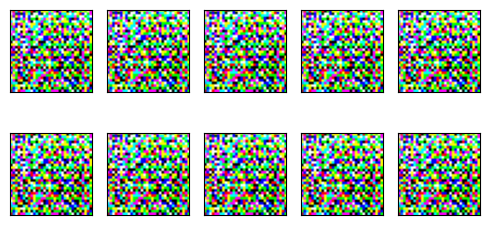

epoch = 2/50, d_loss=1.974, g_loss=0.032                                                                                                     
epoch = 3/50, d_loss=1.976, g_loss=0.031                                                                                                     
epoch = 4/50, d_loss=1.988, g_loss=0.031                                                                                                     
epoch = 5/50, d_loss=1.984, g_loss=0.033                                                                                                     
epoch = 6/50, d_loss=2.002, g_loss=0.032                                                                                                     
epoch = 7/50, d_loss=1.993, g_loss=0.032                                                                                                     
epoch = 8/50, d_loss=1.995, g_loss=0.032                                                                                                     
epoch 

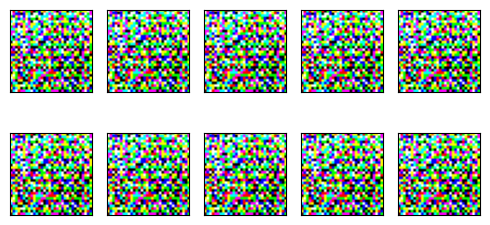

epoch = 12/50, d_loss=2.006, g_loss=0.032                                                                                                     
epoch = 13/50, d_loss=1.986, g_loss=0.030                                                                                                     
epoch = 14/50, d_loss=2.006, g_loss=0.031                                                                                                     
epoch = 15/50, d_loss=1.980, g_loss=0.032                                                                                                     
epoch = 16/50, d_loss=2.002, g_loss=0.034                                                                                                     
epoch = 17/50, d_loss=2.001, g_loss=0.033                                                                                                     
epoch = 18/50, d_loss=2.013, g_loss=0.033                                                                                                     

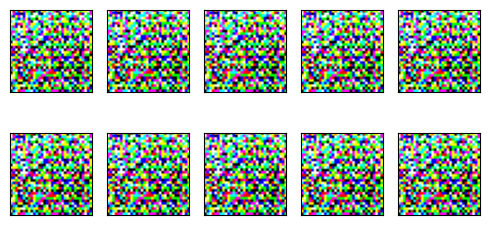

epoch = 22/50, d_loss=1.984, g_loss=0.033                                                                                                     
epoch = 23/50, d_loss=1.989, g_loss=0.032                                                                                                     
epoch = 24/50, d_loss=2.000, g_loss=0.031                                                                                                     
epoch = 25/50, d_loss=1.977, g_loss=0.032                                                                                                     
epoch = 26/50, d_loss=2.009, g_loss=0.032                                                                                                     
epoch = 27/50, d_loss=1.977, g_loss=0.032                                                                                                     
epoch = 28/50, d_loss=1.967, g_loss=0.031                                                                                                     

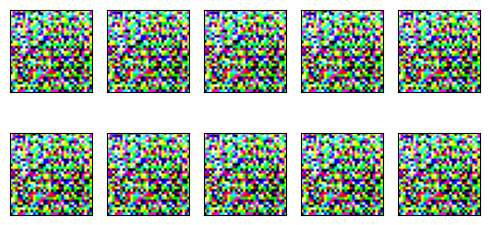

epoch = 32/50, d_loss=2.006, g_loss=0.032                                                                                                     
epoch = 33/50, d_loss=2.019, g_loss=0.032                                                                                                     
epoch = 34/50, d_loss=2.000, g_loss=0.033                                                                                                     
epoch = 35/50, d_loss=2.003, g_loss=0.032                                                                                                     
epoch = 36/50, d_loss=1.977, g_loss=0.032                                                                                                     
epoch = 37/50, d_loss=2.011, g_loss=0.029                                                                                                     
epoch = 38/50, d_loss=1.982, g_loss=0.032                                                                                                     

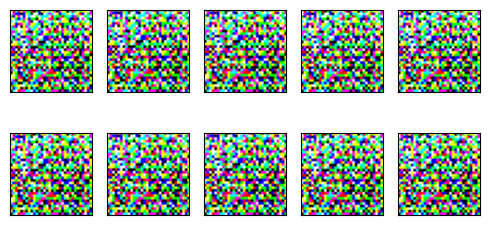

epoch = 42/50, d_loss=1.985, g_loss=0.033                                                                                                     
epoch = 43/50, d_loss=2.009, g_loss=0.033                                                                                                     
epoch = 44/50, d_loss=1.982, g_loss=0.033                                                                                                     
epoch = 45/50, d_loss=2.013, g_loss=0.032                                                                                                     
epoch = 46/50, d_loss=2.002, g_loss=0.033                                                                                                     
epoch = 47/50, d_loss=1.980, g_loss=0.032                                                                                                     
epoch = 48/50, d_loss=1.988, g_loss=0.032                                                                                                     

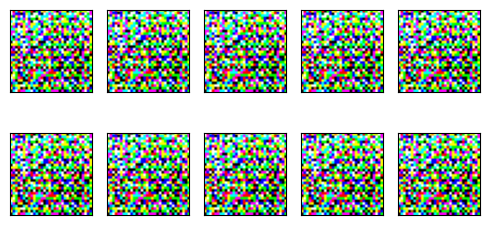

In [ ]:
epochs = 50
batch_size = 32
smooth = 0.1

real = tf.ones(shape=(batch_size, 1))
fake = tf.zeros(shape=(batch_size, 1))

d_loss = []
g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):

        # Train Discriminator weights
        discriminator.trainable = True

        # Real samples
        X_batch = X_train[i * batch_size : (i + 1) * batch_size]
        d_loss_real = discriminator.train_on_batch(
            x=X_batch, y=real * (1 - smooth)
        )

        # Fake Samples
        z = tf.random.normal(shape=(batch_size, latent_dim), mean=0, stddev=1)
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)

        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

        # Train Generator weights
        discriminator.trainable = False

        z = tf.random.normal(shape=(batch_size, latent_dim), mean=0, stddev=1)
        g_loss_batch = d_g.train_on_batch(x=z, y=real)

        print(
            "epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f"
            % (
                e + 1,
                epochs,
                i,
                len(X_train) // batch_size,
                d_loss_batch,
                g_loss_batch[0],
            ),
            100 * " ",
            end="\r",
        )

    d_loss.append(d_loss_batch)
    g_loss.append(g_loss_batch[0])

    print(
        "epoch = %d/%d, d_loss=%.3f, g_loss=%.3f"
        % (e + 1, epochs, d_loss[-1], g_loss[-1]),
        100 * " ",
    )

    if e % 10 == 0:
        samples = 10

        z = tf.random.normal(shape=(samples, latent_dim), mean=0, stddev=1)
        x_fake = generator.predict(z)

        fig = plt.figure(figsize=(WIDTH_SIZE, HEIGHT_SIZE))
        for k in range(samples):
            plt.subplot(2, 5, k + 1, xticks=[], yticks=[])
            plt.imshow(((x_fake[k] + 1) * 127).astype(np.uint8))

        plt.tight_layout()
        plt.show()

###**5. Evaluate model**

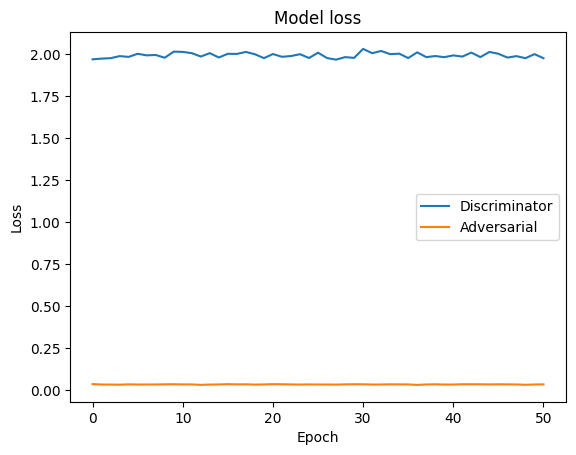

In [ ]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()

##**Demonstrate the superiority of Gradient Ascent over Gradient Descent for optimizing the generator's objective function**

####**Why do we need gradient ascent rather gradient descent in some situations?**

In Generative Adversarial Networks (GANs), optimizing the generator and discriminator networks involves a minimax game, where the generator aims to generate realistic data samples to fool the discriminator, while the discriminator aims to distinguish between real and fake samples accurately.

We formulate this process as a gradient descent problem, where both networks update their parameters based on the gradients of their respective objectives.

However, in practice, optimizing GANs can be challenging due to several reasons:

1. Unstable Training Dynamics: GAN training is notoriously unstable, characterized by mode collapse, vanishing gradients, and oscillations. This instability can lead to suboptimal convergence or even failure to converge to a good solution.

2. Mode Collapse: Mode collapse occurs when the generator learns to generate only a subset of the possible outputs, ignoring the diversity present in the training data. This can happen if the discriminator becomes too strong, causing the generator gradients to vanish. As a result, the generator fails to learn properly, and the training collapses.

3. Non-Convex Optimization: GAN training involves non-convex optimization, where the loss landscape is highly complex and contains multiple local minima. Finding the global optimum becomes challenging, and the optimization process can get stuck in poor local minima.

To address these challenges, researchers have explored various techniques, including modifying the loss functions, designing more stable architectures, and employing advanced optimization algorithms.

In gradient ascent, by flipping the sign of the generator's loss function, you effectively turn the minimax game into a maximin game, where the generator aims to maximize its objective (fooling the discriminator) rather than minimizing it. This change can sometimes help alleviate mode collapse and improve convergence stability by preventing the generator gradients from vanishing too quickly.

However, while gradient ascent can sometimes provide benefits, it's not a universal solution and may not always lead to better results. The effectiveness of this approach depends on various factors, including the specific GAN architecture, dataset characteristics, and training dynamics. As with many aspects of GAN training, it often requires empirical experimentation to determine the most effective optimization strategy for a particular problem.

####**Show it with an example**

To modify a GAN model to work by gradient ascent instead of gradient descent, we need to adjust the loss function of the generator network so that it maximizes its objective instead of minimizing it.

So we do this operation for GAN which we created for CIFAR10 dataset.

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
X_train reshape: (50000, 32, 32, 3)
X_test reshape: (10000, 32, 32, 3)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 2048)              204800    
                                                                 
 batch_normalization_12 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 2048)              0         
                                                                 
 reshape_3 (Reshape)         (None, 2, 2, 512)         0         
                                                                 
 conv2d_transpose_12 (Conv2  (None, 4, 4, 256)         3276800   
 DTranspose)                              

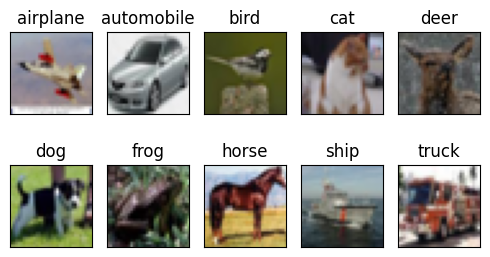

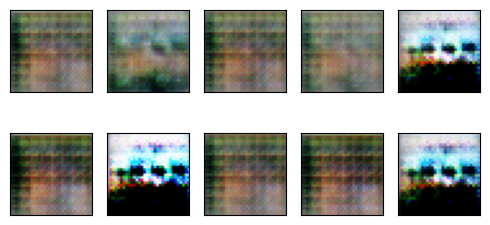

epoch = 2/50, d_loss=0.187, g_loss=-0.562                                                                                                     
epoch = 3/50, d_loss=0.191, g_loss=-2.581                                                                                                     
epoch = 4/50, d_loss=0.188, g_loss=-1.139                                                                                                     
epoch = 5/50, d_loss=0.264, g_loss=-3.495                                                                                                     
epoch = 6/50, d_loss=0.314, g_loss=-3.292                                                                                                     
epoch = 7/50, d_loss=0.472, g_loss=-3.612                                                                                                     
epoch = 8/50, d_loss=0.385, g_loss=-2.721                                                                                                     

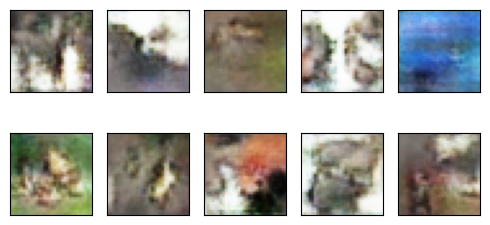

epoch = 12/50, d_loss=0.526, g_loss=-1.528                                                                                                     
epoch = 13/50, d_loss=0.466, g_loss=-1.754                                                                                                     
epoch = 14/50, d_loss=0.564, g_loss=-1.984                                                                                                     
epoch = 15/50, d_loss=0.460, g_loss=-1.802                                                                                                     
epoch = 16/50, d_loss=0.488, g_loss=-2.193                                                                                                     
epoch = 17/50, d_loss=0.542, g_loss=-1.897                                                                                                     
epoch = 18/50, d_loss=0.446, g_loss=-2.017                                                                                              

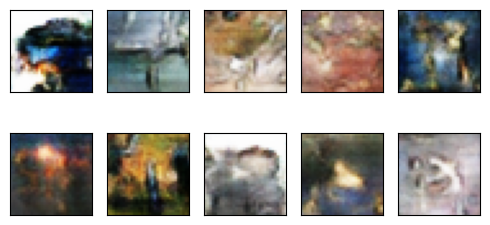

epoch = 22/50, d_loss=0.543, g_loss=-1.493                                                                                                     
epoch = 23/50, d_loss=0.448, g_loss=-2.031                                                                                                     
epoch = 24/50, d_loss=0.446, g_loss=-1.723                                                                                                     
epoch = 25/50, d_loss=0.458, g_loss=-1.779                                                                                                     
epoch = 26/50, d_loss=0.462, g_loss=-1.794                                                                                                     
epoch = 27/50, d_loss=0.565, g_loss=-1.997                                                                                                     
epoch = 28/50, d_loss=0.490, g_loss=-2.084                                                                                              

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

WIDTH_SIZE = 5
HEIGHT_SIZE = 3

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(WIDTH_SIZE, HEIGHT_SIZE))
for i in range(num_classes):
    ax = plt.subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    img = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(img)

plt.tight_layout()

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

if tf.keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
    X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)
    input_shape = (3, 32, 32)
else:
    X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
    X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
    input_shape = (32, 32, 3)

# convert class vectors to binary class matrices
Y_train = tf.keras.utils.to_categorical(y_train, num_classes)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# the generator is using tanh activation, for which we need to preprocess
# the image data into the range between -1 and 1.

X_train = np.float32(X_train)
X_train = (X_train / 255 - 0.5) * 2
X_train = np.clip(X_train, -1, 1)

X_test = np.float32(X_test)
X_test = (X_test / 255 - 0.5) * 2
X_test = np.clip(X_test, -1, 1)

print('X_train reshape:', X_train.shape)
print('X_test reshape:', X_test.shape)

# latent space dimension
latent_dim = 100

# Generator network
generator = tf.keras.models.Sequential()

generator.add(
    tf.keras.layers.Dense(
        2 * 2 * 512, use_bias=False, input_shape=(latent_dim,)
    )
)
generator.add(tf.keras.layers.BatchNormalization())
generator.add(tf.keras.layers.LeakyReLU())
generator.add(tf.keras.layers.Reshape((2, 2, 512)))

generator.add(
    tf.keras.layers.Conv2DTranspose(
        256, kernel_size=5, strides=2, padding="same", use_bias=False
    )
)
generator.add(tf.keras.layers.BatchNormalization())
generator.add(tf.keras.layers.LeakyReLU())

generator.add(
    tf.keras.layers.Conv2DTranspose(
        128, kernel_size=5, strides=2, padding="same", use_bias=False
    )
)
generator.add(tf.keras.layers.BatchNormalization())
generator.add(tf.keras.layers.LeakyReLU())

generator.add(
    tf.keras.layers.Conv2DTranspose(
        64, kernel_size=5, strides=2, padding="same", use_bias=False
    )
)
generator.add(tf.keras.layers.BatchNormalization())
generator.add(tf.keras.layers.LeakyReLU())

generator.add(
    tf.keras.layers.Conv2DTranspose(
        3,
        kernel_size=5,
        strides=2,
        padding="same",
        use_bias=False,
        activation="tanh",
    )
)

# prints a summary representation of your model
generator.summary()

# imagem shape 32x32x3
img_shape = X_train[0].shape

# Discriminator network
discriminator = tf.keras.models.Sequential()

discriminator.add(
    tf.keras.layers.Conv2D(
        64, kernel_size=5, strides=2, padding="same", input_shape=(img_shape)
    )
)
discriminator.add(tf.keras.layers.LeakyReLU())
discriminator.add(tf.keras.layers.Dropout(0.3))

discriminator.add(
    tf.keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same")
)
discriminator.add(tf.keras.layers.LeakyReLU())
discriminator.add(tf.keras.layers.Dropout(0.3))

discriminator.add(
    tf.keras.layers.Conv2D(256, kernel_size=5, strides=2, padding="same")
)
discriminator.add(tf.keras.layers.LeakyReLU())
discriminator.add(tf.keras.layers.Dropout(0.3))

discriminator.add(
    tf.keras.layers.Conv2D(512, kernel_size=5, strides=2, padding="same")
)
discriminator.add(tf.keras.layers.LeakyReLU())
discriminator.add(tf.keras.layers.Dropout(0.3))

discriminator.add(tf.keras.layers.Flatten())

discriminator.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# prints a summary representation of your model
discriminator.summary()

# Optimizer
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0003, beta_1=0.5)

discriminator.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["binary_accuracy"],
)

discriminator.trainable = False

z = tf.keras.layers.Input(shape=(latent_dim,))
img = generator(z)
decision = discriminator(img)
d_g = tf.keras.models.Model(inputs=z, outputs=decision)

d_g.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["binary_accuracy"],
)

# prints a summary representation of your model
d_g.summary()

epochs = 50
batch_size = 32
smooth = 0.1

real = tf.ones(shape=(batch_size, 1))
fake = tf.zeros(shape=(batch_size, 1))

d_loss = []
g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):

        # Train Discriminator weights
        discriminator.trainable = True

        # Real samples
        X_batch = X_train[i * batch_size : (i + 1) * batch_size]
        d_loss_real = discriminator.train_on_batch(
            x=X_batch, y=real * (1 - smooth)
        )

        # Fake Samples
        z = tf.random.normal(shape=(batch_size, latent_dim), mean=0, stddev=1)
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)

        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

        # Train Generator weights
        discriminator.trainable = False

        z = tf.random.normal(shape=(batch_size, latent_dim), mean=0, stddev=1)
        g_loss_batch = d_g.train_on_batch(x=z, y=real)

        print(
            "epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f"
            % (
                e + 1,
                epochs,
                i,
                len(X_train) // batch_size,
                d_loss_batch,
                g_loss_batch[0],
            ),
            100 * " ",
            end="\r",
        )

    d_loss.append(d_loss_batch)
    #we modified here
    g_loss.append(-g_loss_batch[0])

    print(
        "epoch = %d/%d, d_loss=%.3f, g_loss=%.3f"
        % (e + 1, epochs, d_loss[-1], g_loss[-1]),
        100 * " ",
    )

    if e % 10 == 0:
        samples = 10

        z = tf.random.normal(shape=(samples, latent_dim), mean=0, stddev=1)
        x_fake = generator.predict(z)

        fig = plt.figure(figsize=(WIDTH_SIZE, HEIGHT_SIZE))
        for k in range(samples):
            plt.subplot(2, 5, k + 1, xticks=[], yticks=[])
            plt.imshow(((x_fake[k] + 1) * 127).astype(np.uint8))

        plt.tight_layout()
        plt.show()

# plotting the metrics
plt.plot(d_loss)
plt.plot(g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()

#**Part 3**

###**How should you employ Transfer Learning If your dataset is small and very different from the original dataset used to train the pre-trained model?**

When our dataset is small and significantly different from the original dataset used to train a pre-trained model,we have to employ transfer learning by following these steps:

1. Select a Pre-trained Model: Choose a pre-trained model that is well-suited for your task based on its architecture and the nature of your data. Models like VGG, ResNet, Inception, or MobileNet are often used as base models for transfer learning due to their versatility and availability.

2. Customize the Top Layers: Since your dataset is small and different from the original dataset, you'll typically remove the top layers (or freeze them) of the pre-trained model, leaving only the base layers. These base layers capture general features that are useful for various tasks. Then, you add new layers on top that are specific to your task and train them from scratch. These new layers will learn to extract features relevant to your dataset.

3. Fine-tune the Model: Optionally, if you have sufficient data, you can fine-tune the entire model (including the base layers) by unfreezing some or all of the layers and continuing training with a lower learning rate. This allows the model to adapt more to the specifics of your dataset while retaining the general knowledge learned from the original dataset.

4. Data Augmentation: Augment your small dataset with data augmentation techniques to artificially increase the size and diversity of your training data. This helps prevent overfitting and improves the generalization of your model.

5. Regularization: Apply regularization techniques such as dropout or weight decay to prevent overfitting, especially when dealing with a small dataset.
Use Pre-trained Embeddings: If your dataset is too small even for fine-tuning, you can use the pre-trained model as a feature extractor. Extract features from the pre-trained model and train a simple classifier (e.g., logistic regression, SVM) on top of these features using your small dataset.

6. Evaluate and Tune: Evaluate the performance of your model on a validation set and fine-tune hyperparameters such as learning rate, batch size, and architecture if necessary.

7. Iterate: Iterate on the above steps, experimenting with different architectures, hyperparameters, and techniques until you achieve satisfactory performance on your dataset.

###**How should you employ Transfer Learning If your dataset is small and similar to the original dataset used to train the pre-trained model?**

When our dataset is small and similar to the original dataset used to train the pre-trained model, we have to employ transfer learning by following these steps:

1. Select a Pre-trained Model: Choose a pre-trained model that was trained on a dataset similar to yours. For example, if your dataset consists of natural images, models like VGG, ResNet, Inception, or MobileNet trained on ImageNet could be good choices.

2. Fine-tune the Model: Instead of removing or freezing the top layers of the pre-trained model, you can fine-tune the entire model on your dataset. Since your dataset is similar to the original dataset, the features learned by the pre-trained model are likely to be relevant to your task. Fine-tuning allows the model to adapt these features to your specific dataset.

3. Data Augmentation: Apply data augmentation techniques to artificially increase the size and diversity of your training data. This helps prevent overfitting and improves the generalization of your model. Common augmentation techniques include random rotations, translations, flips, zooms, and color adjustments.

4. Regularization: Apply regularization techniques such as dropout or weight decay to prevent overfitting, especially when dealing with a small dataset.
Use a Smaller Learning Rate: Since you're fine-tuning the entire model, use a smaller learning rate compared to training from scratch. This helps prevent the model from overfitting to the new dataset too quickly.

5. Evaluate and Tune: Evaluate the performance of your fine-tuned model on a validation set and tune hyperparameters such as learning rate, batch size, and regularization strength if necessary.

6. Iterate: Iterate on the above steps, experimenting with different architectures, hyperparameters, and techniques until you achieve satisfactory performance on your dataset.

###**Example if your dataset is small and very similar to the original dataset**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained VGG16 model trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers
base_model.trainable = False

# Add custom top layers for your specific task
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(5, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/drive/MyDrive/AI/Project_1/datasets/flowers/train'
val_dir = '/content/drive/MyDrive/AI/Project_1/datasets/flowers/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
)


Found 336 images belonging to 5 classes.
Found 95 images belonging to 5 classes.
Epoch 1/50
6/6 [==============================] - 8s 1s/step - loss: 1.5667 - accuracy: 0.3065 - val_loss: 1.4567 - val_accuracy: 0.3368
Epoch 2/50
6/6 [==============================] - 7s 1s/step - loss: 1.3508 - accuracy: 0.4435 - val_loss: 1.4434 - val_accuracy: 0.4421
Epoch 3/50
6/6 [==============================] - 7s 1s/step - loss: 1.2123 - accuracy: 0.5417 - val_loss: 1.2276 - val_accuracy: 0.4947
Epoch 4/50
6/6 [==============================] - 9s 2s/step - loss: 1.0784 - accuracy: 0.6369 - val_loss: 1.2884 - val_accuracy: 0.4632
Epoch 5/50
6/6 [==============================] - 10s 1s/step - loss: 1.0061 - accuracy: 0.6637 - val_loss: 1.2245 - val_accuracy: 0.5053
Epoch 6/50
6/6 [==============================] - 9s 1s/step - loss: 0.9286 - accuracy: 0.6726 - val_loss: 1.2301 - val_accuracy: 0.5053
Epoch 7/50
6/6 [==============================] - 6s 1s/step - loss: 0.9112 - accuracy: 0.6726 -

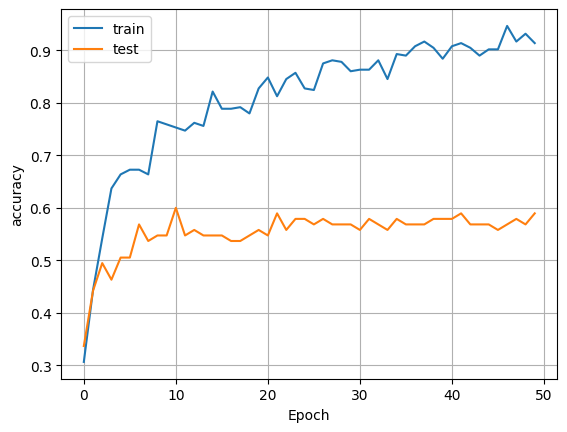

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

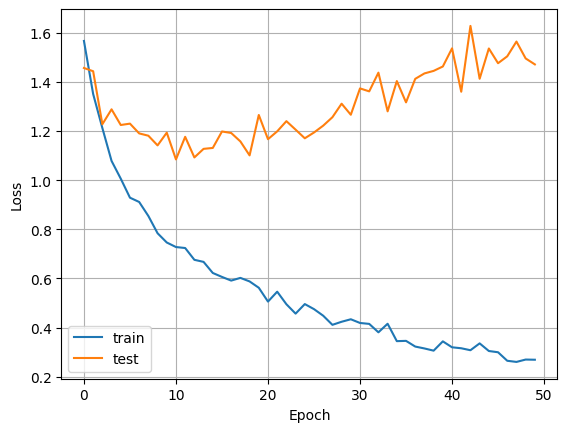

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

###**Example if your dataset is small and very different from the original dataset**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained VGG16 model trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a custom classification head
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
predictions = layers.Dense(10, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/drive/MyDrive/AI/Project_1/datasets/dress/train'
val_dir = '/content/drive/MyDrive/AI/Project_1/datasets/dress/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

# Train the model
model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
)


Found 279 images belonging to 10 classes.
Found 123 images belonging to 10 classes.
Epoch 1/50
5/5 [==============================] - 17s 1s/step - loss: 5.5445 - accuracy: 0.0968 - val_loss: 2.4251 - val_accuracy: 0.1626
Epoch 2/50
5/5 [==============================] - 8s 2s/step - loss: 2.2932 - accuracy: 0.2115 - val_loss: 2.1988 - val_accuracy: 0.1057
Epoch 3/50
5/5 [==============================] - 7s 1s/step - loss: 2.1907 - accuracy: 0.1756 - val_loss: 2.3963 - val_accuracy: 0.1301
Epoch 4/50
5/5 [==============================] - 8s 2s/step - loss: 2.1832 - accuracy: 0.1541 - val_loss: 2.2505 - val_accuracy: 0.1626
Epoch 5/50
5/5 [==============================] - 7s 1s/step - loss: 2.1470 - accuracy: 0.1792 - val_loss: 2.1926 - val_accuracy: 0.1626
Epoch 6/50
5/5 [==============================] - 8s 2s/step - loss: 2.1383 - accuracy: 0.1971 - val_loss: 2.1786 - val_accuracy: 0.1301
Epoch 7/50
5/5 [==============================] - 7s 2s/step - loss: 2.1230 - accuracy: 0.204

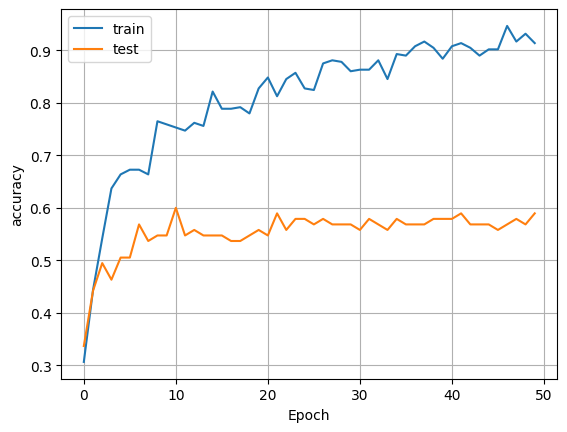

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

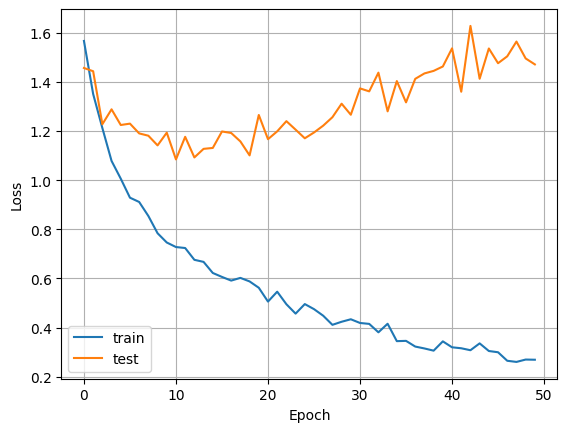

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)